Importamos las librerias que vamos a utilizar

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Creamos los dataframes

In [157]:
hechos = pd.read_excel('datasets/homicidios.xlsx')
victimas = pd.read_excel('datasets/homicidios.xlsx', sheet_name='VICTIMAS')

## Dataframe 'hechos'

In [158]:
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


Contenidos del dataframe 'Hechos' por columna:

* **ID:** identificador único del siniestro
* **N_VICTIMAS:** numero de victimas
* **FECHA:** fecha del siniestro
* **AAAA:** año del siniestro
* **MM:** mes del siniestro
* **DD:** dia del mes del siniestro
* **HORA:** hora del siniestro
* **HH:** franja horaria entera
* **LUGAR_DEL_HECHO:** direccion donde ocurrió el siniestro
* **TIPO_DE_CALLE:** tipo de calle, ya sea avenida, gral paz, calle o autopista
* **Altura:** altura de la calle donde se produjo el siniestro
* **Cruce:** cruce de calles, en caso de haber sido en una intersección
* **Direccion_Normalizada:** direccion en formato normalizado USIG
* **COMUNA:** comuna de la ciudad (1 a 15)
* **XY(CABA):** geocodificación plana
* **pos x:** longitud con separador punto. WGS84
* **pos y:** latitud con separador punto. WGS84
* **PARTICIPANTES:** victimas y acusados
* **VICTIMA:** vehiculo que ocupaba quien haya fallecido o terminado lastimado 
* **ACUSADO:** vehiculo que ocupaba quien resultó acusado/a del hecho, sin implicar culpabilidad legal

Basandonos en el contenido mostrado, decidimos reducir el numero de columnas que vamos a utilizar para nuestro Analisis Exploratorio y, posteriormente, en nuestro Dashboard

In [159]:
hechos = hechos[['ID', 'N_VICTIMAS', 'FECHA', 'HH', 'TIPO_DE_CALLE', 'Cruce', 'COMUNA', 'pos x', 'pos y', 'VICTIMA', 'ACUSADO']]

Revisamos el estado de nuestro dataframe

In [160]:
hechos.head()

,ID,N_VICTIMAS,FECHA,HH,TIPO_DE_CALLE,Cruce,COMUNA,pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,4,AVENIDA,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.47533969,-34.68757022,MOTO,AUTO
1,2016-0002,1,2016-01-02,1,GRAL PAZ,DE LOS CORRALES AV.,9,-58.50877521,-34.66977709,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,7,AVENIDA,NaN,1,-58.39040293,-34.63189362,MOTO,AUTO
3,2016-0004,1,2016-01-10,0,AVENIDA,"VILLEGAS, CONRADO, GRAL.",8,-58.46503904,-34.68092974,MOTO,SD
4,2016-0005,1,2016-01-21,5,AVENIDA,"SAENZ PE?A, LUIS, PRES.",1,-58.38718297,-34.62246630,MOTO,PASAJEROS


Observamos los tipos de dato en cada columna

In [161]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             696 non-null    object        
 1   N_VICTIMAS     696 non-null    int64         
 2   FECHA          696 non-null    datetime64[ns]
 3   HH             696 non-null    object        
 4   TIPO_DE_CALLE  696 non-null    object        
 5   Cruce          525 non-null    object        
 6   COMUNA         696 non-null    int64         
 7   pos x          696 non-null    object        
 8   pos y          696 non-null    object        
 9   VICTIMA        696 non-null    object        
 10  ACUSADO        696 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 59.9+ KB


Chequeo de nulos por columna

In [162]:
hechos.isnull().sum()

ID                 0
N_VICTIMAS         0
FECHA              0
HH                 0
TIPO_DE_CALLE      0
Cruce            171
COMUNA             0
pos x              0
pos y              0
VICTIMA            0
ACUSADO            0
dtype: int64

Observaciones: notamos una gran cantidad de nulos tanto en 'Cruce'

In [163]:
nulos_cruce = int(hechos['Cruce'].isnull().mean() * 100)
print(f'El porcentaje de valores nulos en la columna Cruce es de {nulos_cruce}%')

El porcentaje de valores nulos en la columna Cruce es de 24%


Decidimos cambiar la columna a tipo booleano, para saber si el siniestro fue en una intersección

In [164]:
# Cambiamos los datos nulos a 'False'
hechos['Cruce'] = hechos['Cruce'].fillna(False).astype(bool)

# Convertimos la columna a tipo bool
hechos['Cruce'] = hechos['Cruce'].astype(bool)

# Mostramos el porcentaje de cada valor
porcentaje_cruce = hechos['Cruce'].value_counts(normalize=True) * 100
porcentaje_cruce

Cruce
True     75.431034
False    24.568966
Name: proportion, dtype: float64

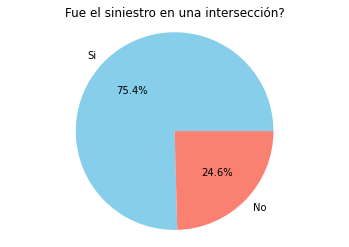

In [165]:
# Calcula el conteo de True y False en la columna 'Cruce'
conteo_cruce = hechos['Cruce'].value_counts()

# Define las etiquetas manualmente
etiquetas = ['Si', 'No']

# Crea un gráfico de torta con etiquetas definidas manualmente
conteo_cruce.plot(kind='pie', autopct='%1.1f%%', labels=etiquetas, colors=['skyblue', 'salmon'])

# Ajusta el aspecto del gráfico
plt.axis('equal')  # Para que la torta se vea como un círculo
plt.ylabel(None)  # Elimina las etiquetas del eje Y

# Añade un título
plt.title('Fue el siniestro en una intersección?')

# Muestra el gráfico
plt.show()

Observaciones: el grafico de torta nos muestra las proporciones, dejando claro que aproximadamente 3 de cada 4 choques son en intersecciones

Cantidad de siniestros:

In [166]:
total_siniestros = len(hechos['ID'].unique())
print(f'La cantidad total de siniestros fue de {total_siniestros}')

La cantidad total de siniestros fue de 696


Verificamos los valores de la fila 'HH'

In [167]:
hechos['HH'].value_counts()

HH
7     41
6     40
9     36
5     35
14    33
12    32
8     31
18    31
10    31
16    30
19    30
17    30
22    30
21    29
23    28
11    27
3     26
20    26
15    25
1     24
4     23
0     23
2     17
13    17
SD     1
Name: count, dtype: int64

Observamos un valor 'SD', y procedemos a borrarlo

In [168]:
hechos = hechos[hechos['HH'] != 'SD']

Verificamos si tenemos valores duplicados en el dataframe. Para eso, vamos a ver si hay duplicados en la columna 'ID'

In [169]:
if hechos['ID'].duplicated().any():
    print("Hay valores duplicados en la columna 'ID' del DataFrame.")
else:
    print("No hay valores duplicados en la columna 'ID' del DataFrame.")

No hay valores duplicados en la columna 'ID' del DataFrame.


Revisamos los valores por comuna:

In [170]:
hechos['COMUNA'].value_counts()

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    31
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64

Encontramos dos valores en una supuesta comuna 0, lo cual es un error al no existir la comuna 0. Procedemos a borrarlos

In [171]:
hechos = hechos[hechos['COMUNA'] != 0]

Revisamos la cantidad de siniestros por comuna:

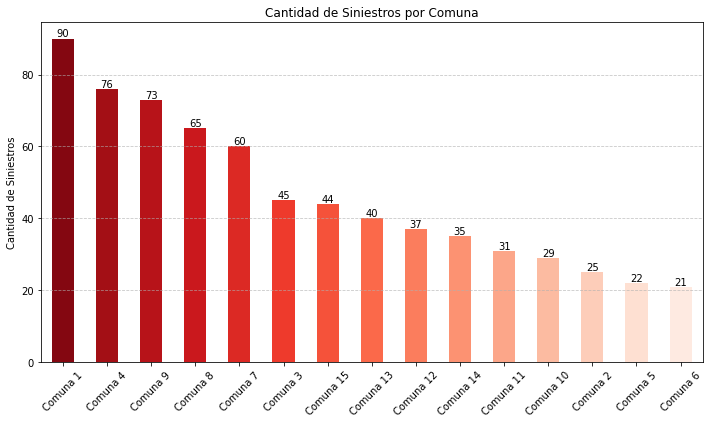

In [172]:
# Agrupa los datos por comuna y cuenta el número de siniestros en cada una
siniestros_por_comuna = hechos.groupby('COMUNA').size()

# Ordena los datos de mayor a menor cantidad de siniestros
siniestros_por_comuna = siniestros_por_comuna.sort_values(ascending=False)

# Define una paleta de colores más adecuada y luego invierte la lista
colores = list(reversed(sns.color_palette("Reds", len(siniestros_por_comuna))))

# Crea un gráfico de barras con la nueva paleta de colores
plt.figure(figsize=(10, 6))
grafico = siniestros_por_comuna.plot(kind='bar', color=colores)

# Agrega el número de siniestros en cada barra
for i, valor in enumerate(siniestros_por_comuna):
    grafico.annotate(str(valor), (i, valor), ha='center', va='bottom')

plt.xlabel('')
plt.ylabel('Cantidad de Siniestros')
plt.title('Cantidad de Siniestros por Comuna')
plt.xticks(range(len(siniestros_por_comuna)), ['Comuna ' + str(comuna) for comuna in siniestros_por_comuna.index], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Observaciones: podemos ver que la comuna 1 tiene la mayor cantidad de siniestros, dando a suponer que el motivo podría ser la gran cantidad de tráfico, al ser el centro de la Capital Federal

Revisamos la cantidad de incidentes por tipo de calle:

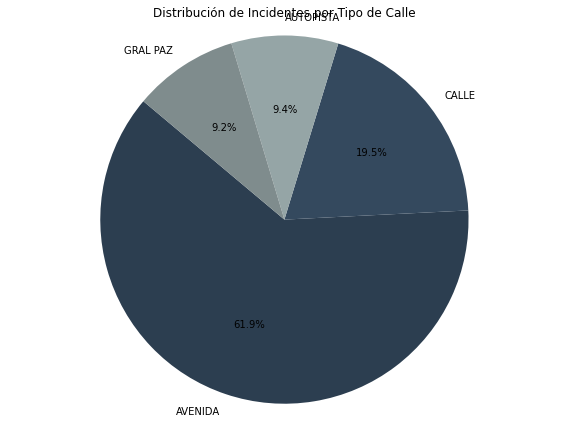

In [173]:
# Define una paleta de colores más sobria
colores = ['#2c3e50', '#34495e', '#95a5a6', '#7f8c8d']  # Grises oscuros

# Cuenta la cantidad de cada tipo de calle
conteo_tipos_calle = hechos['TIPO_DE_CALLE'].value_counts()

# Crea un gráfico de torta con la paleta de colores definida
plt.figure(figsize=(8, 6))
plt.pie(conteo_tipos_calle, labels=conteo_tipos_calle.index, colors=colores, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Incidentes por Tipo de Calle')
plt.axis('equal')  # Para que el gráfico de torta sea un círculo
plt.tight_layout()  # Ajustar el diseño
plt.show()

Observaciones: Mas de la mitad de los incidentes se producen en Avenidas. La diferencia es tan grande con el resto que se considera que debería ser un foco central a la hora de reducir los incientes.

#### Cantidad de incidentes por mes

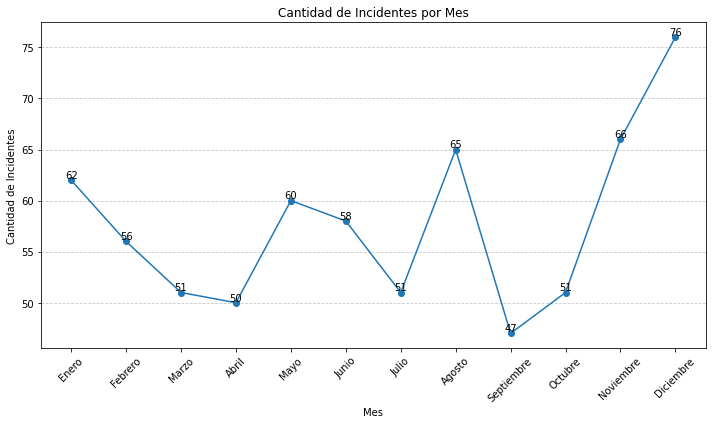

In [174]:
# Calcular la cantidad de incidentes por mes
incidentes_por_mes = hechos.groupby(hechos['FECHA'].dt.month).size()

# Ordenar los datos por el orden natural de los meses del año
meses_nombres = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}
incidentes_por_mes = incidentes_por_mes.rename(index=meses_nombres)

# Graficar los incidentes por mes como un gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(incidentes_por_mes.index, incidentes_por_mes.values, marker='o')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Incidentes')
plt.title('Cantidad de Incidentes por Mes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar el número de incidentes encima de cada punto en el lineplot
for x, y in zip(incidentes_por_mes.index, incidentes_por_mes.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Observaciones: La diferencia de incidentes por mes parece ser bastante pareja, teniendo a Diciembre como el mes con mayor cantidad, con un total de 77.

### Cantidad de victimas por año

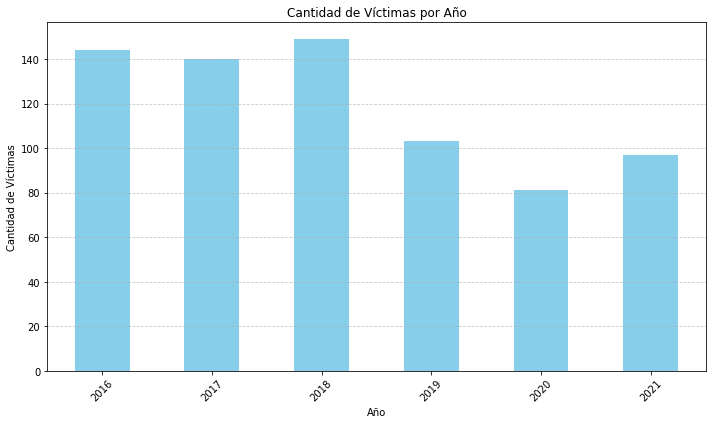

In [175]:
# Calcular la cantidad de víctimas por año y graficar
plt.figure(figsize=(10, 6))

# Gráfico de barras
hechos.groupby(hechos['FECHA'].dt.year)['N_VICTIMAS'].sum().plot(kind='bar', color='skyblue')
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas por Año')

# Gráfico de línea
plt.plot(hechos.groupby(hechos['FECHA'].dt.year)['N_VICTIMAS'].sum().index,
         hechos.groupby(hechos['FECHA'].dt.year)['N_VICTIMAS'].sum().values,
         marker='o', color='red', linewidth=2)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Culpabilidad en cada incidente

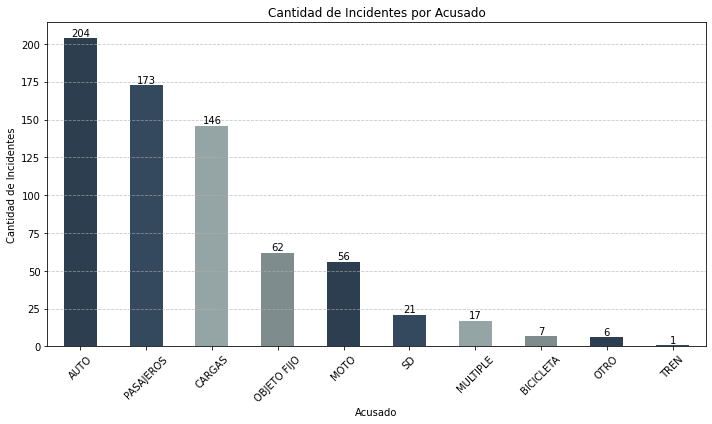

In [176]:
# Calcular la cantidad de incidentes por acusado
incidentes_por_acusado = hechos['ACUSADO'].value_counts()

# Define una paleta de colores más sobria
colores = ['#2c3e50', '#34495e', '#95a5a6', '#7f8c8d']  # Grises oscuros

# Crear el gráfico de barras con colores más sobrios
plt.figure(figsize=(10, 6))
grafico = incidentes_por_acusado.plot(kind='bar', color=colores)
plt.xlabel('Acusado')
plt.ylabel('Cantidad de Incidentes')
plt.title('Cantidad de Incidentes por Acusado')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar el número de incidentes encima de cada barra
for i, valor in enumerate(incidentes_por_acusado):
    grafico.text(i, valor, str(valor), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Víctimas de incidentes

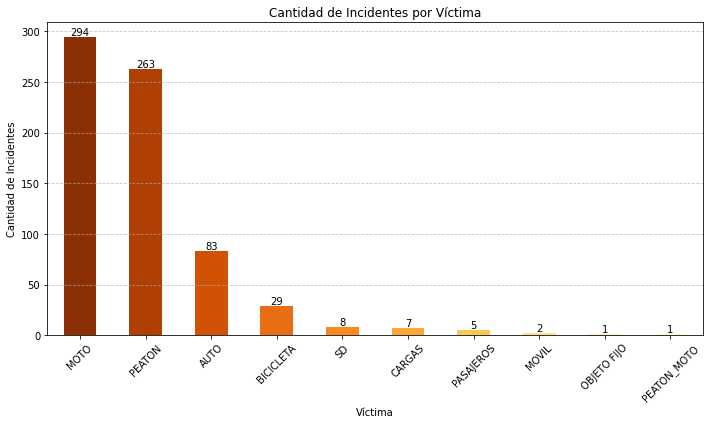

In [177]:
# Calcular la cantidad de incidentes por víctima
incidentes_por_victima = hechos['VICTIMA'].value_counts()

# Obtener la cantidad de colores necesarios para la paleta
num_colores = len(incidentes_por_victima)

# Definir una paleta de colores graduales
paleta_colores = list(reversed(sns.color_palette("YlOrBr", num_colores)))

# Ordenar las víctimas por cantidad de incidentes (de mayor a menor)
incidentes_por_victima = incidentes_por_victima.sort_values(ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
grafico = incidentes_por_victima.plot(kind='bar', color=paleta_colores)
plt.xlabel('Víctima')
plt.ylabel('Cantidad de Incidentes')
plt.title('Cantidad de Incidentes por Víctima')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar el número de incidentes encima de cada barra
for i, valor in enumerate(incidentes_por_victima):
    grafico.text(i, valor, str(valor), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Observaciones: se nota una clara mayoría tanto para peatones como para Motos, con esta última como el grupo de victimas mas grande con un total de 

In [178]:
hechos.head()

,ID,N_VICTIMAS,FECHA,HH,TIPO_DE_CALLE,Cruce,COMUNA,pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,4,AVENIDA,True,8,-58.47533969,-34.68757022,MOTO,AUTO
1,2016-0002,1,2016-01-02,1,GRAL PAZ,True,9,-58.50877521,-34.66977709,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,7,AVENIDA,False,1,-58.39040293,-34.63189362,MOTO,AUTO
3,2016-0004,1,2016-01-10,0,AVENIDA,True,8,-58.46503904,-34.68092974,MOTO,SD
4,2016-0005,1,2016-01-21,5,AVENIDA,True,1,-58.38718297,-34.62246630,MOTO,PASAJEROS


# Dataframe 'victimas'

In [179]:
victimas.head(20)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
5,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24 00:00:00
6,2016-0009,2016-01-24,2016,1,24,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,29,2016-01-26 00:00:00
7,2016-0010,2016-01-29,2016,1,29,CONDUCTOR,MOTO,MASCULINO,18,2016-01-29 00:00:00
8,2016-0012,2016-02-08,2016,2,8,CONDUCTOR,MOTO,MASCULINO,22,2016-02-08 00:00:00
9,2016-0013,2016-02-10,2016,2,10,PEATON,PEATON,MASCULINO,16,2016-02-10 00:00:00


Contenidos del dataframe 'victimas' por columna:

* **ID_hecho:** identificador único del siniestro
* **FECHA:** fecha en formato dd/mm/aaaa
* **AAAA:** año del siniestro
* **MM:** mes del siniestro
* **DD:** día del siniestro
* **ROL:** Posicion relativa al vehiculo que representaba la victima en el momento del siniestro
* **VICTIMA:** Vehiculo que ocupaba quien haya fallecido o se haya lastimado a rahiz del hecho
* **SEXO:** genero informado por fuente policial de la victima
* **EDAD:** edad de la victima al momento del siniestro
* **FECHA_FALLECIMIENTO:** fecha de fallecimiento de la victima

Basandonos en el contenido mostrado, decidimos reducir el numero de columnas que vamos a utilizar para nuestro Analisis Exploratorio y, posteriormente, en nuestro Dashboard

In [180]:
victimas = victimas[['ID_hecho', 'FECHA', 'ROL', 'VICTIMA', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO']]

Revisamos el estado de nuestro dataframe

In [181]:
victimas.head()

,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


Observamos que la columna 'FECHA_FALLECIMIENTO' contiene valores 'SD', que significa 'sin determinar', por lo que procedemos a cambiar la columna y que solo diga si la persona falleció o no

In [182]:
# Reemplazar 'SD' por False
victimas.loc[victimas['FECHA_FALLECIMIENTO'] == 'SD', 'FECHA_FALLECIMIENTO'] = False

# Convertir la columna en tipo booleano
victimas.loc[:, 'FECHA_FALLECIMIENTO'] = victimas['FECHA_FALLECIMIENTO'].astype(bool)

# Mostrar el DataFrame actualizado
victimas.head()

,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19,True
1,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70,True
2,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30,True
3,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18,False
4,2016-0005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29,True


Observamos los tipos de datos en cada columna

In [183]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   ROL                  717 non-null    object        
 3   VICTIMA              717 non-null    object        
 4   SEXO                 717 non-null    object        
 5   EDAD                 717 non-null    object        
 6   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 39.3+ KB


Cambiamos la columna 'EDAD' a tipo entero

Checkeamos por valores nulos por columna

In [184]:
victimas.isnull().sum()

ID_hecho               0
FECHA                  0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

Revisamos valores duplicados

In [185]:
hay_duplicados = victimas.duplicated().any()

if hay_duplicados:
    print("Hay filas duplicadas en el DataFrame 'victimas'.")
else:
    print("No hay filas duplicadas en el DataFrame 'victimas'.")

No hay filas duplicadas en el DataFrame 'victimas'.


Revisamos la columna 'sexo'

In [186]:
victimas['SEXO'].value_counts()

SEXO
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64

In [187]:
# Revisamos las filas donde 'sexo' es igual a 'SD'
victimas.loc[victimas['SEXO'] == 'SD']

,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
36,2016-0049,2016-04-17,SD,SD,SD,SD,False
39,2016-0052,2016-04-20,SD,MOTO,SD,SD,False
108,2016-0136,2016-10-25,CONDUCTOR,MOTO,SD,SD,False
121,2016-0151,2016-11-18,PEATON,PEATON,SD,SD,False
138,2016-0171,2016-12-25,CONDUCTOR,MOTO,SD,SD,False
141,2016-0174,2016-12-27,SD,SD,SD,SD,False


Viendo el contenido de esas filas, decidimos borrarlas del dataframe

In [188]:
victimas = victimas.drop(victimas.loc[victimas['SEXO'] == 'SD'].index)

Revisamos la columna 'EDAD' por valores atipicos

In [189]:
victimas['EDAD'].value_counts()

EDAD
SD    47
30    28
29    24
23    24
27    20
      ..
11     1
13     1
85     1
7      1
88     1
Name: count, Length: 86, dtype: int64

Observamos que hay filas con el valor 'SD'

In [190]:
# Calcular el porcentaje de valores igual a 'SD' en la columna 'EDAD'
porcentaje_SD = (victimas['EDAD'] == 'SD').mean() * 100

# Calcular el porcentaje de valores distintos de 'SD' en la columna 'EDAD'
porcentaje_no_SD = 100 - porcentaje_SD

print("Porcentaje de valores igual a 'SD': {:.2f}%".format(porcentaje_SD))
print("Porcentaje de valores distintos de 'SD': {:.2f}%".format(porcentaje_no_SD))

Porcentaje de valores igual a 'SD': 6.61%
Porcentaje de valores distintos de 'SD': 93.39%


Viendo esto, procedemos a borrarlas para poder realizar graficos

In [191]:
victimas = victimas[victimas['EDAD'] != 'SD']

Ahora realizamos un boxplot para encontrar valores atipicos

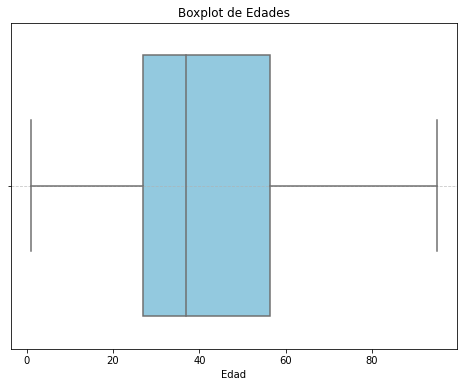

In [192]:
# Crear el boxplot de la columna 'EDAD'
plt.figure(figsize=(8, 6))
sns.boxplot(x='EDAD', data=victimas, color='skyblue')
plt.title('Boxplot de Edades')
plt.xlabel('Edad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observaciones: no encontramos valores atipicos fuera de los 100 años

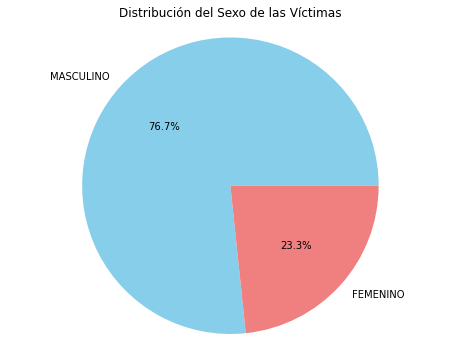

In [193]:
# Calcular la distribución del sexo de las víctimas
distribucion_sexo = victimas['SEXO'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(distribucion_sexo, labels=distribucion_sexo.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribución del Sexo de las Víctimas')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

Observación: 3/4 de las victimas son de genero masculino

#### Procedemos a cambiar el nombre de cada columna en ambos dataframes

In [194]:
hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'HH', 'TIPO_DE_CALLE', 'Cruce', 'COMUNA',
       'pos x', 'pos y', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [195]:
# Creamos una lista con los nuevos nombres para el dataframe 'hechos'
hechos_lista = ['id', 'cantidad_victimas', 'fecha', 'franja_horaria', 'tipo_de_calle', 'cruce', 'comuna', 'longitud', 'latitud', 'vehiculo_victima', 'vehiculo_acusado']

# Asignamos los nuevos nombres
hechos.columns = hechos_lista

In [196]:
# Creamos una lista con los nuevos nombres para el dataframe 'victimas'
victimas_lista = ['id', 'fecha', 'rol', 'vehiculo_victima', 'sexo_victima', 'edad_victima', 'fatal']

# Asignamos los nuevos nombres
victimas.columns = victimas_lista

Exportamos los archivos en formato CSV para utilizar en Power BI

In [198]:
victimas.to_csv('datasets/victimas_df.csv', index=False)
hechos.to_csv('datasets/hechos_df.csv', index=False)

In [204]:
victimas.loc[victimas['fatal'] == False]


,id,fecha,rol,vehiculo_victima,sexo_victima,edad_victima,fatal
3,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18,False
16,2016-0022,2016-02-21,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,41,False
19,2016-0027,2016-02-28,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,34,False
22,2016-0031,2016-03-08,CONDUCTOR,MOTO,MASCULINO,21,False
46,2016-0064,2016-05-14,PEATON,PEATON,MASCULINO,20,False
48,2016-0067,2016-05-21,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,30,False
49,2016-0068,2016-05-22,CONDUCTOR,MOTO,MASCULINO,58,False
51,2016-0073,2016-06-11,CONDUCTOR,MOTO,MASCULINO,23,False
52,2016-0074,2016-06-12,CONDUCTOR,AUTO,MASCULINO,60,False
56,2016-0078,2016-06-13,CONDUCTOR,MOTO,MASCULINO,30,False
